#**PREDICTING HOTEL BOOKING CANCELLATIONS**

##**IMPORTING LIBRARIES**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

##**LODING THE DATA**

In [104]:
hotel_df = pd.read_csv('/content/INNHotelsGroup.csv')
hotel_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


##**STRUCTURE** **OF** **THE** **DATA**

In [105]:
#SHAPE OF THE DATA
print(hotel_df.shape)
print(hotel_df.info)
# statistics of the numerical data
hotel_df.describe()

(36275, 19)
<bound method DataFrame.info of       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [106]:
# Check for duplicate values
duplicate_rows = hotel_df[hotel_df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [107]:
# Assuming 'Booking_ID' is the column with unique values
hotel_df = hotel_df.drop('Booking_ID', axis=1)

In [108]:
# Making a list of all categorical variables
categorical_variables = [var for var in hotel_df.columns if hotel_df[var].dtype == 'O']
print(categorical_variables)
# Printing number of count of each unique value in each column
for column in hotel_df.columns:
  print(f"Column: {column}")
  print(hotel_df[column].value_counts())
  print("\n")

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
Column: no_of_adults
no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64


Column: no_of_children
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64


Column: no_of_weekend_nights
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64


Column: no_of_week_nights
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64


Column: type_of_meal_plan
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64


Column: required_car_parking_space
required_ca

 # **Perform Exploratory Data Analysis (EDA)**

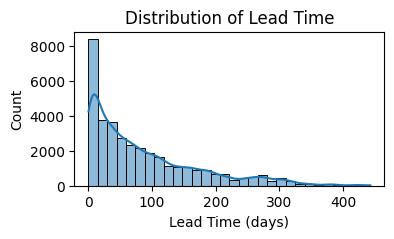

In [109]:
#Univariate Analysis
# Plot distribution of lead_time
plt.figure(figsize=(4,2))
sns.histplot(hotel_df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.show()


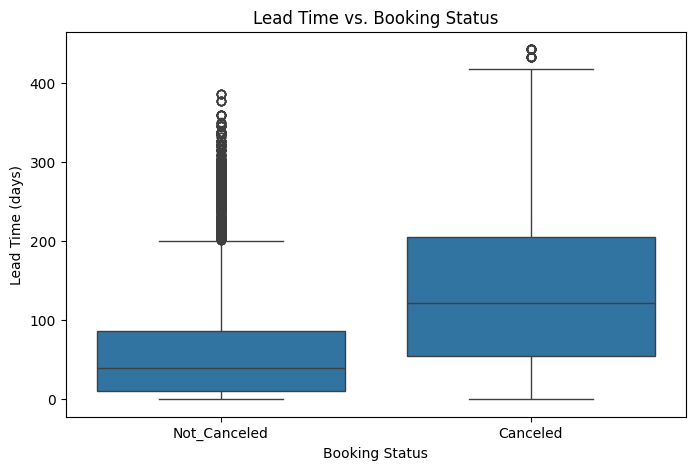

In [110]:
#Bivariate Analysis
# Boxplot to analyze lead_time vs. booking_status
plt.figure(figsize=(8,5))
sns.boxplot(x='booking_status', y='lead_time', data=hotel_df)
plt.title('Lead Time vs. Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (days)')
plt.show()

**What are the busiest months in the hotel?**

Busiest months in the hotel:
arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: booking_status, dtype: int64


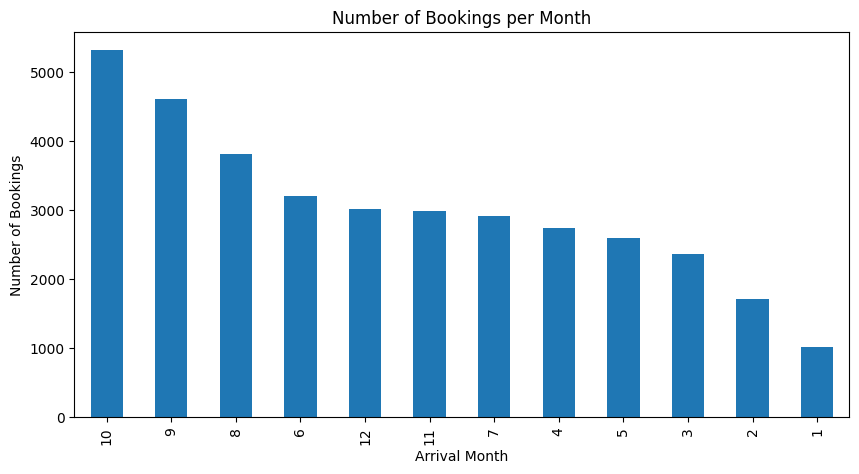

In [111]:
# Group by arrival_date_month and count the number of bookings
monthly_bookings = hotel_df.groupby('arrival_month')['booking_status'].count()
# Sort the months in descending order of bookings
busiest_months = monthly_bookings.sort_values(ascending=False)
# Print the busiest months
print("Busiest months in the hotel:")
print(busiest_months)
plt.figure(figsize=(10, 5))
busiest_months.plot(kind='bar')
plt.title('Number of Bookings per Month')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.show()

**Which market segment do most of the guests come from?**

In [112]:
market_segment_counts = hotel_df['market_segment_type'].value_counts()
# Display the market segment with the highest count
market_segment_counts

,count
market_segment_type,
Online,23214
Offline,10528
Corporate,2017
Complementary,391
Aviation,125


**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

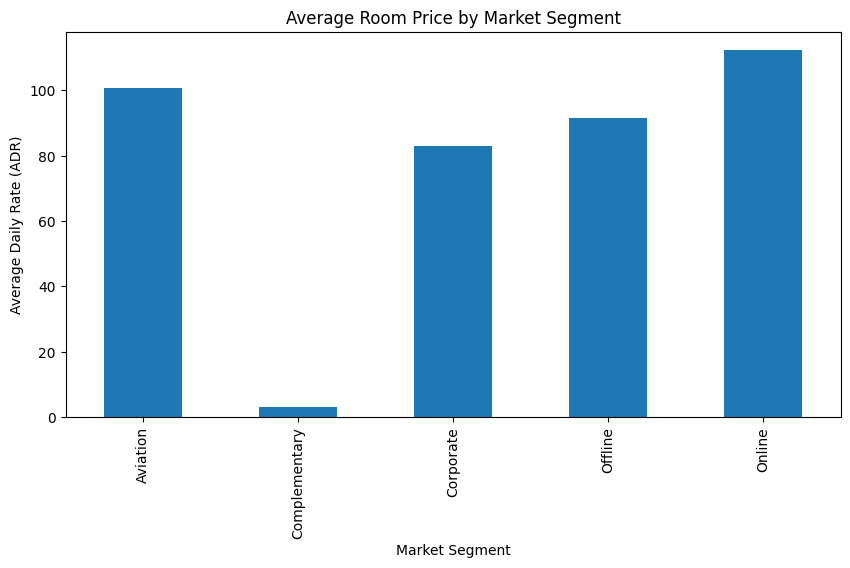

market_segment_type
Aviation         100.704000
Complementary      3.141765
Corporate         82.911740
Offline           91.632679
Online           112.256855
Name: avg_price_per_room, dtype: float64


In [113]:
# Group by market segment and calculate the average adr (average daily rate)
average_adr_by_segment = hotel_df.groupby('market_segment_type')['avg_price_per_room'].mean()
# Plot the average adr for each market segment
plt.figure(figsize=(10, 5))
average_adr_by_segment.plot(kind='bar')
plt.title('Average Room Price by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()
print(average_adr_by_segment)

**What percentage of bookings are canceled?**

In [114]:
total_bookings =hotel_df['booking_status'].count()
# Calculate the number of canceled bookings (assuming 'Canceled' is the label for canceled bookings)
canceled_bookings = hotel_df[hotel_df['booking_status'] == 'Canceled'].shape[0]
# Calculate the percentage of canceled bookings
cancellation_percentage = (canceled_bookings / total_bookings) * 100
# Display the result
print(f"Percentage of canceled bookings: {cancellation_percentage:.2f}%")

Percentage of canceled bookings: 32.76%


**Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

In [115]:
repeating_guests = hotel_df[hotel_df['repeated_guest'] == 1]
# Total number of repeating guest bookings
total_repeating_guests = repeating_guests['booking_status'].count()
# Number of repeating guests who canceled their bookings (assuming 'Canceled' is the label for canceled bookings)
repeating_guests_canceled = repeating_guests[repeating_guests['booking_status'] == 'Canceled'].shape[0]
# Calculate the percentage of repeating guests who canceled
repeating_guests_cancellation_percentage = (repeating_guests_canceled / total_repeating_guests) * 100
# Display the result
print(f"Percentage of repeating guests who canceled: {repeating_guests_cancellation_percentage:.2f}%")

Percentage of repeating guests who canceled: 1.72%


**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

no_of_special_requests
0    43.206755
1    23.766816
2    14.596700
3     0.000000
4     0.000000
5     0.000000
Name: booking_status, dtype: float64


<ipython-input-116-8bc86aa17cf5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=special_requests_cancellation_rate.index, y=special_requests_cancellation_rate.values, palette='Blues')


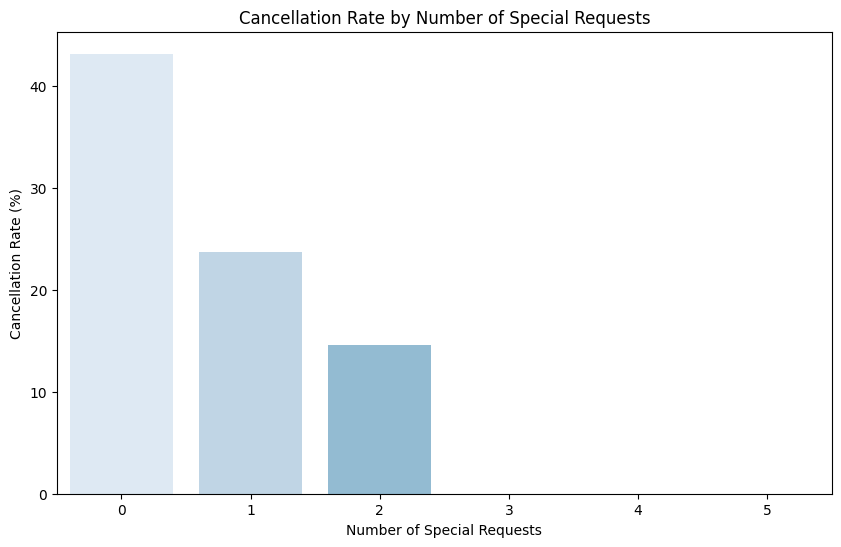

In [116]:
# Group the data by the number of special requests and calculate the cancellation rate for each group
special_requests_cancellation_rate = hotel_df.groupby('no_of_special_requests')['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)
# Display the cancellation rates
print(special_requests_cancellation_rate)
# Plot the relationship between special requests and cancellation rate
plt.figure(figsize=(10,6))
sns.barplot(x=special_requests_cancellation_rate.index, y=special_requests_cancellation_rate.values, palette='Blues')
plt.title('Cancellation Rate by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Rate (%)')
plt.show()

##**Data Preprocessing**

In [117]:
# Checking for missing values
missing_values = hotel_df.isnull().sum()
# Display variables with missing values
missing_values[missing_values > 0]

,0


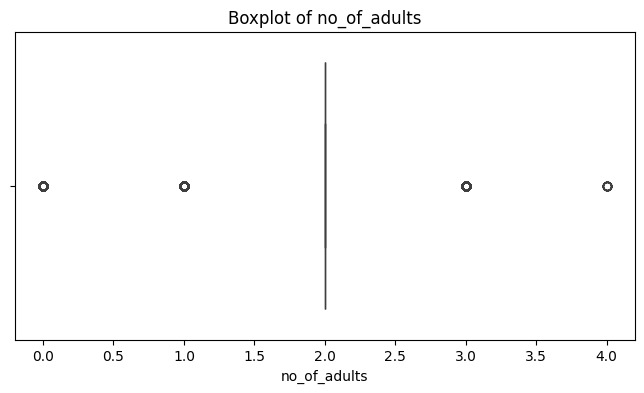

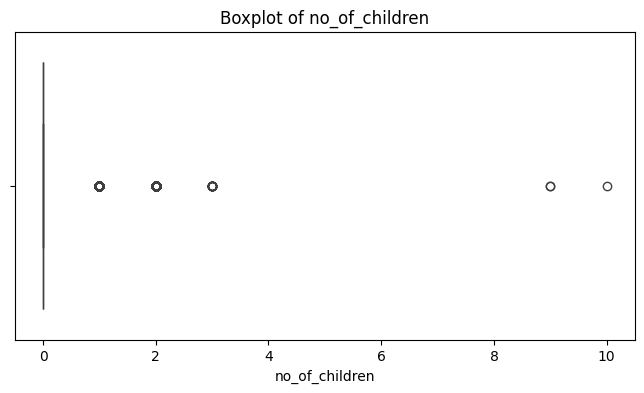

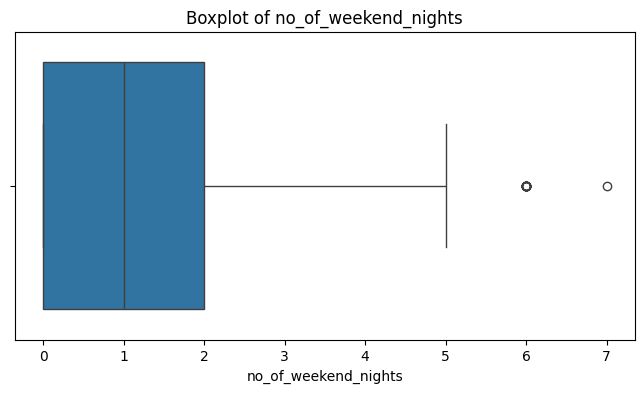

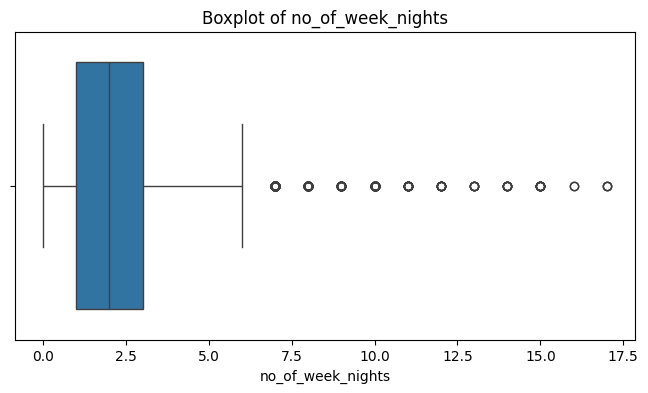

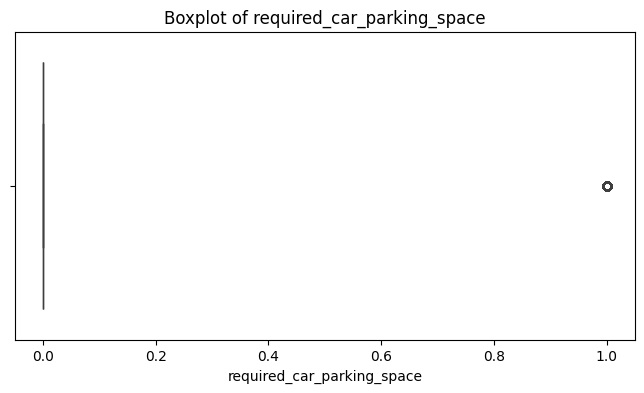

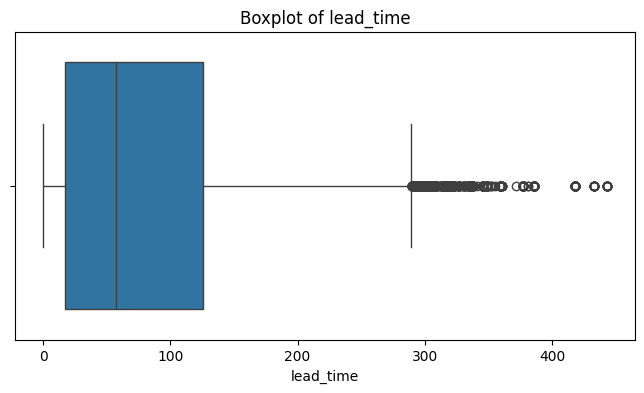

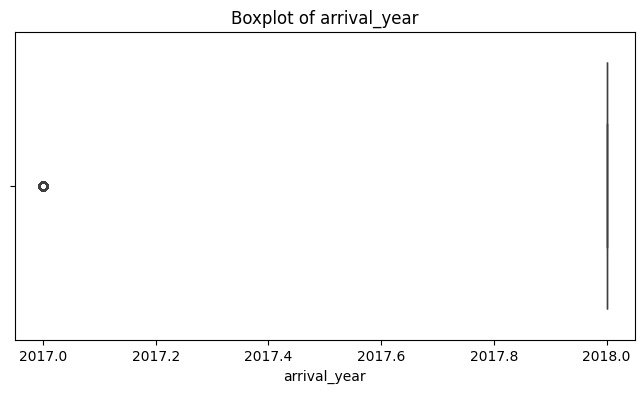

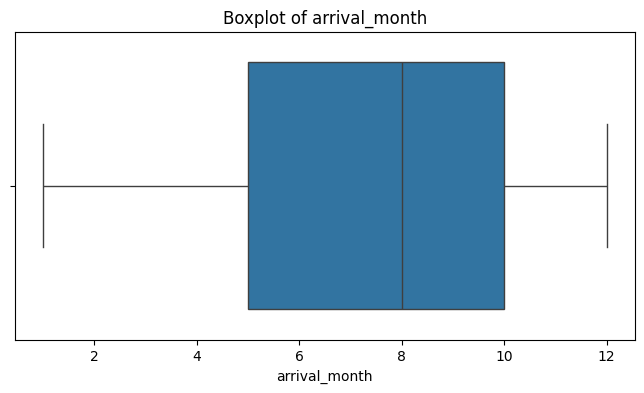

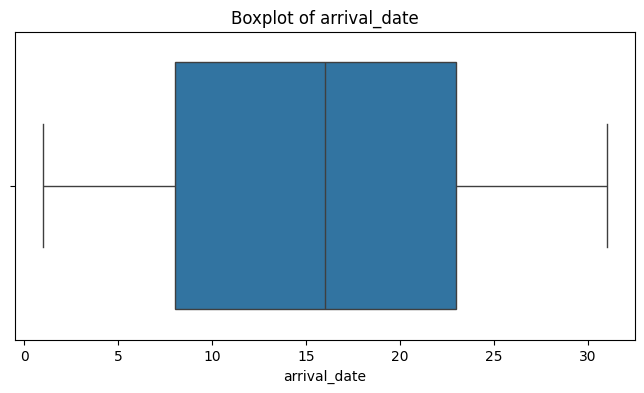

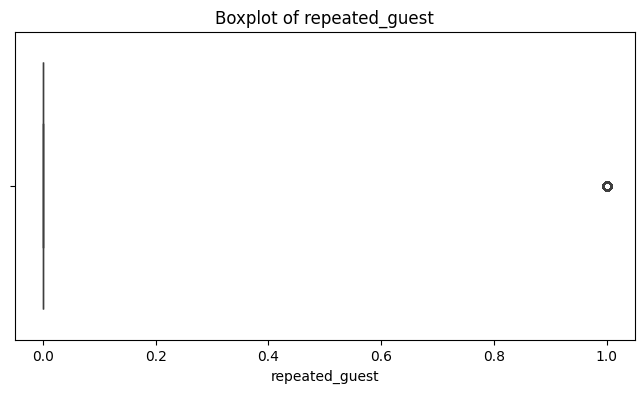

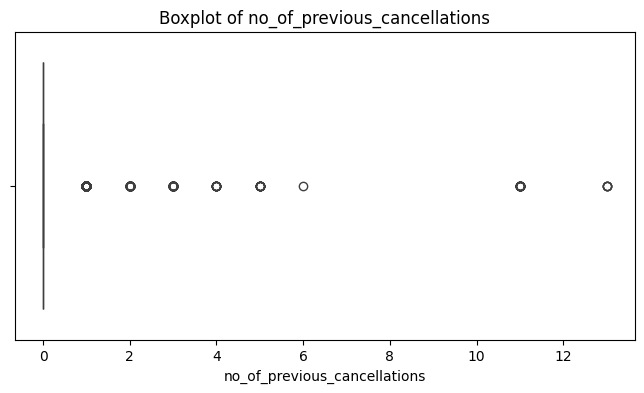

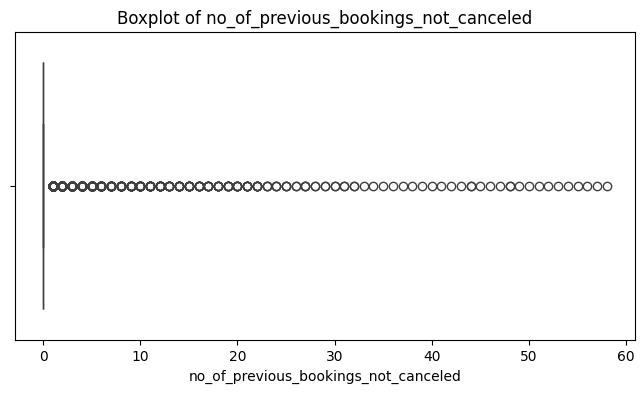

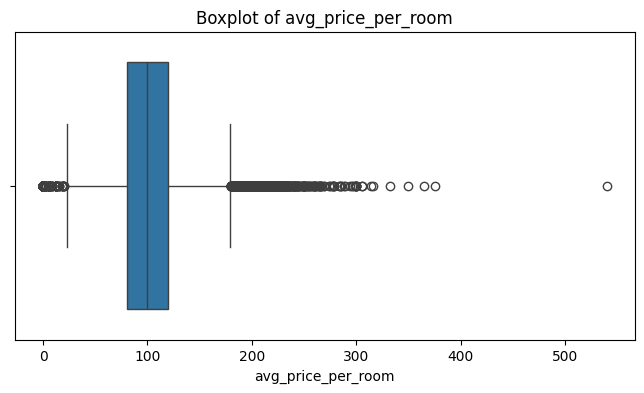

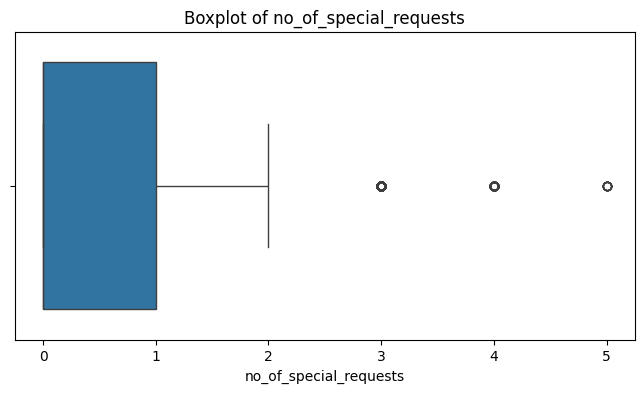

In [118]:
# Identify outliers using boxplots for numerical features
numerical_features = hotel_df.select_dtypes(include=np.number).columns.tolist()
for feature in numerical_features:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=hotel_df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

# Example of capping outliers for 'lead_time' using IQR method
Q1 = hotel_df['lead_time'].quantile(0.25)
Q3 = hotel_df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
hotel_df['lead_time'] = np.where(hotel_df['lead_time'] > upper_bound, upper_bound,
                                 np.where(hotel_df['lead_time'] < lower_bound, lower_bound,
                                          hotel_df['lead_time']))

In [119]:
columns_to_delete = ['arrival_month', 'market_segment_type']
hotel_df = hotel_df.drop(columns=columns_to_delete)
print(hotel_df.columns)



Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_date',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')


**Data Preparation for modeling**

In [120]:
# Separate features (X) and target (y)
X = hotel_df.drop('booking_status', axis=1)
y = hotel_df['booking_status']
# Encode categorical features using Label Encoding
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']):
  X[column] = label_encoder.fit_transform(X[column])
if isinstance(y, pd.Series) and y.dtype == object:
  y = label_encoder.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print(y_train[:5])

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
25629             2               1                     2                  1   
14473             2               1                     1                  1   
23720             2               0                     0                  3   
5843              2               0                     2                  5   
18709             1               0                     0                  2   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
25629                  0                           0                   0   
14473                  0                           0                   0   
23720                  0                           0                   0   
5843                   0                           0                   0   
18709                  0                           0                   0   

       lead_time  arrival_year  arrival_date  repeated_guest  

In [121]:
# Convert y_train to a Pandas Series before resetting the index
y_train = pd.Series(y_train)
y_train = y_train.reset_index(drop=True)

# Verify that X_train and y_train have the same index
print(X_train.index)
print(y_train.index)

Index([25629, 14473, 23720,  5843, 18709,  7411, 22965, 25677, 33711, 20727,
       ...
        2433,   769,  1685, 16023, 21962, 16850,  6265, 11284,   860, 15795],
      dtype='int64', length=29020)
RangeIndex(start=0, stop=29020, step=1)


In [122]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Shape of Training set : ", y_train.shape)
print("Shape of test set : ", y_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
# Convert y_test to a Pandas Series to use value_counts()
print(pd.Series(y_test).value_counts(normalize=True))

Shape of Training set :  (29020, 15)
Shape of test set :  (7255, 15)
Shape of Training set :  (29020,)
Shape of test set :  (7255,)
Percentage of classes in training set:
1    0.673708
0    0.326292
Name: proportion, dtype: float64
Percentage of classes in test set:
1    0.666988
0    0.333012
Name: proportion, dtype: float64


**Scaling the Data**

In [123]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

##**Model Building**

In [124]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    acc = accuracy_score(target, class_pred)
    recall = recall_score(target, class_pred)
    precision = precision_score(target, class_pred)
    f1 = f1_score(target, class_pred)
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [125]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Logistic Regression (with Statsmodel)**

In [126]:
import statsmodels.api as SM
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [127]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

Optimization terminated successfully.
         Current function value: 0.453488
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                29020
Model:                          Logit   Df Residuals:                    29004
Method:                           MLE   Df Model:                           15
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                  0.2819
Time:                        07:57:49   Log-Likelihood:                -13160.
converged:                       True   LL-Null:                       -18327.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    1.1194      0.

**Checking Logistic Regression model performance on training set**

In [128]:
y_pred = LogisticReg.predict(X_train_with_intercept)

In [129]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.786044,0.898573,0.806093,0.849825


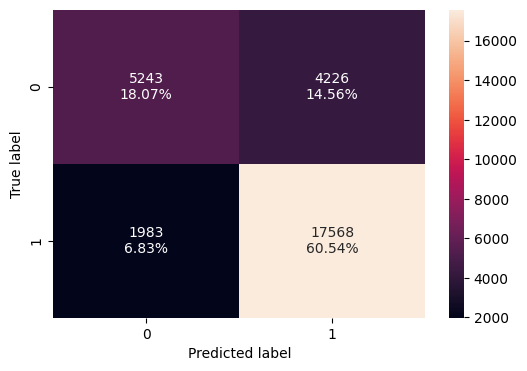

In [130]:
plot_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

**Checking Logistic Regression model performance on test set**

In [131]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

,Accuracy,Recall,Precision,F1
0,0.789938,0.903699,0.805192,0.851607


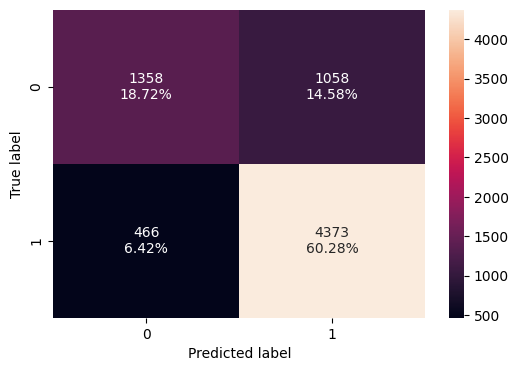

In [132]:
plot_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

**Naive - Bayes Classifier**

Naive Bayes Model Performance (Training Set):
   Accuracy    Recall  Precision        F1
0   0.42836  0.159941   0.949878  0.273782

Naive Bayes Model Performance (Test Set):
   Accuracy   Recall  Precision        F1
0   0.43377  0.16057   0.944107  0.274461


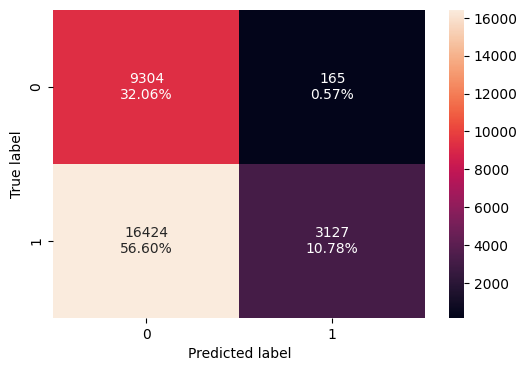

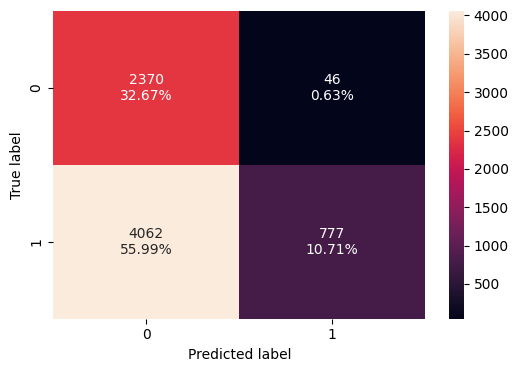

In [133]:
# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
# Evaluate the model on the training set
nb_perf_train = model_performance_classification(nb_model, X_train_scaled, y_train)
print("Naive Bayes Model Performance (Training Set):")
print(nb_perf_train)
plot_confusion_matrix(nb_model, X_train_scaled, y_train)
# Evaluate the model on the test set
nb_perf_test = model_performance_classification(nb_model, X_test_scaled, y_test)
print("\nNaive Bayes Model Performance (Test Set):")
print(nb_perf_test)
plot_confusion_matrix(nb_model, X_test_scaled, y_test)


**KNN Classifier (K = 3)**

KNN Model Performance (Training Set):
   Accuracy    Recall  Precision       F1
0  0.908994  0.945681   0.921318  0.93334

KNN Model Performance (Test Set):
   Accuracy    Recall  Precision        F1
0  0.842729  0.904112   0.865994  0.884643


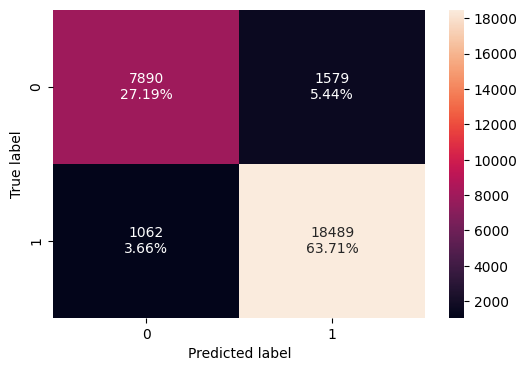

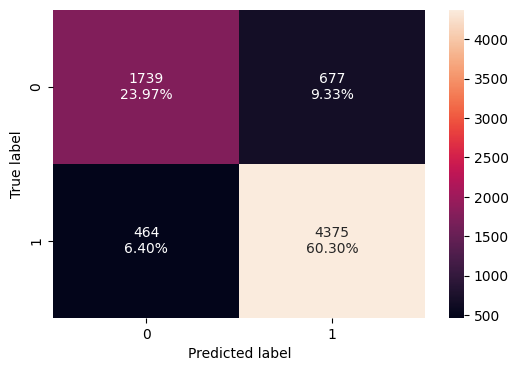

In [134]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
# Evaluate the model on the training set
knn_perf_train = model_performance_classification(knn_model, X_train_scaled, y_train) #This line was commented out, causing the error
print("KNN Model Performance (Training Set):")
print(knn_perf_train)
plot_confusion_matrix(knn_model, X_train_scaled, y_train)
# Evaluate the model on the test set
knn_perf_test = model_performance_classification(knn_model, X_test_scaled, y_test)
print("\nKNN Model Performance (Test Set):")
print(knn_perf_test)
plot_confusion_matrix(knn_model, X_test_scaled, y_test)

**Decision Tree Classifier**

Decision Tree Model Performance (Training Set):
   Accuracy    Recall  Precision        F1
0  0.993384  0.995243   0.994938  0.995091

Decision Tree Model Performance (Test Set):
   Accuracy   Recall  Precision        F1
0  0.851826  0.88262   0.893889  0.888219


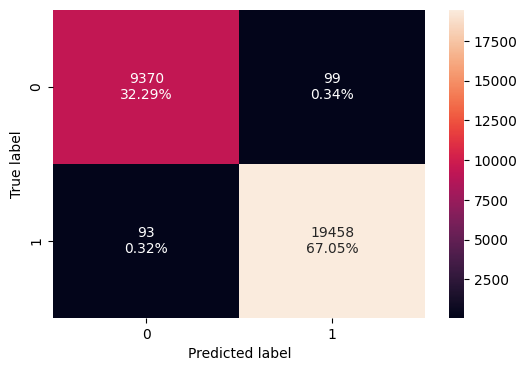

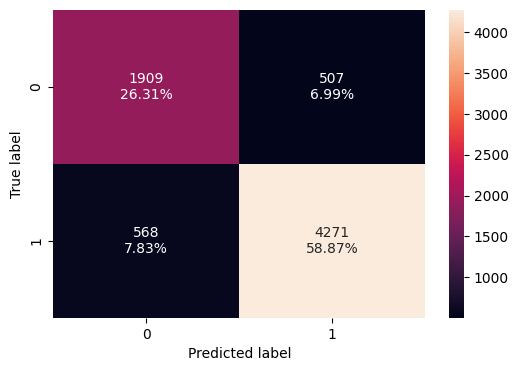

In [135]:
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
# Evaluate the model on the training set
dt_perf_train = model_performance_classification(dt_model, X_train_scaled, y_train)
print("Decision Tree Model Performance (Training Set):")
print(dt_perf_train)
plot_confusion_matrix(dt_model, X_train_scaled, y_train)
# Evaluate the model on the test set
dt_perf_test = model_performance_classification(dt_model, X_test_scaled, y_test)
print("\nDecision Tree Model Performance (Test Set):")
print(dt_perf_test)
plot_confusion_matrix(dt_model, X_test_scaled, y_test)

##**Model Performance Improvement**

**Logistic Regression (deal with multicollinearity, remove high p-value variables, determine optimal threshold using ROC curve)**

Logistic Regression - Dealing with Multicollinearity

In [136]:
def calculate_vif(idf):
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [137]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train)
print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                Variable        VIF
0                           no_of_adults  17.303831
1                         no_of_children   1.339869
2                   no_of_weekend_nights   1.956722
3                      no_of_week_nights   3.748010
4                      type_of_meal_plan   1.335679
5             required_car_parking_space   1.066553
6                     room_type_reserved   1.914959
7                              lead_time   2.266878
8                           arrival_year  27.464186
9                           arrival_date   4.197811
10                        repeated_guest   1.600316
11          no_of_previous_cancellations   1.346304
12  no_of_previous_bookings_not_canceled   1.607325
13                    avg_price_per_room  14.385261
14                no_of_special_requests   1.772527


In [138]:
# Dropping columns with VIF > 5 iteratively
while vif_result['VIF'].max() > 5:
    high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
    print(f"Dropping {high_vif_column} due to high VIF")
    X_train_scaled.drop(columns=high_vif_column, inplace=True)
    X_test_scaled.drop(columns=high_vif_column, inplace=True)
    vif_result = calculate_vif(X_train_scaled)

Dropping arrival_year due to high VIF


**Dealing with high p-value variables**

In [139]:
predictors = X_train_with_intercept.copy()
cols = predictors.columns.tolist()
# setting an initial max p-value
max_p_value = 1
while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]
    # fitting the model
    model = SM.Logit(y_train, x_train_aux).fit()
    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    print(f"Dropping column {feature_with_p_max} with p-value: {max_p_value}")

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

Optimization terminated successfully.
         Current function value: 0.453488
         Iterations 10
Dropping column no_of_previous_bookings_not_canceled with p-value: 0.3457436892337242
Optimization terminated successfully.
         Current function value: 0.453514
         Iterations 9
Dropping column no_of_children with p-value: 0.09751537116606174
Optimization terminated successfully.
         Current function value: 0.453561
         Iterations 9
Dropping column arrival_date with p-value: 0.08759930147630561
Optimization terminated successfully.
         Current function value: 0.453611
         Iterations 9
Dropping column room_type_reserved with p-value: 0.0027143144666534435
['const', 'no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests']


In [140]:
X_train_significant = X_train_with_intercept[selected_features]
X_test_significant = X_test_with_intercept[selected_features]
X_train_significant.head(10)

,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests
0,1.0,0.300222,1.373324,-0.856920,-0.491395,-0.181652,-0.506727,-0.709597,-2.137519,-0.162657,-0.063513,1.636392,-0.788364
1,1.0,0.300222,0.221378,-0.856920,-0.491395,-0.181652,-0.506727,0.172516,0.467832,-0.162657,-0.063513,0.512227,1.755084
2,1.0,0.300222,-0.930567,0.568823,-0.491395,-0.181652,-0.506727,2.518693,0.467832,-0.162657,-0.063513,-0.953457,-0.788364
3,1.0,0.300222,1.373324,1.994567,-0.491395,-0.181652,-0.506727,1.360919,0.467832,-0.162657,-0.063513,-0.889422,-0.788364
4,1.0,-1.627739,-0.930567,-0.144048,-0.491395,-0.181652,-0.506727,1.275158,0.467832,-0.162657,-0.063513,0.754136,-0.788364
5,1.0,0.300222,-0.930567,0.568823,-0.491395,-0.181652,-0.506727,-0.121521,0.467832,-0.162657,-0.063513,0.256088,0.483360
6,1.0,0.300222,0.221378,-0.144048,-0.491395,-0.181652,-0.506727,2.316542,0.467832,-0.162657,-0.063513,-0.241960,-0.788364
7,1.0,0.300222,0.221378,0.568823,2.375953,-0.181652,-0.506727,-0.954628,0.467832,-0.162657,-0.063513,-1.058758,-0.788364
8,1.0,0.300222,1.373324,1.994567,-0.491395,-0.181652,-0.506727,0.062252,0.467832,-0.162657,-0.063513,-0.564695,0.483360
9,1.0,0.300222,1.373324,-1.569792,-0.491395,-0.181652,3.061289,-0.342050,0.467832,-0.162657,-0.063513,2.177130,0.483360


Training the Logistic Regression model again with only the significant features

In [141]:
LogisticReg_tuned = SM.Logit(y_train,X_train_significant).fit()
print(LogisticReg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.453611
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                29020
Model:                          Logit   Df Residuals:                    29007
Method:                           MLE   Df Model:                           12
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                  0.2817
Time:                        07:58:46   Log-Likelihood:                -13164.
converged:                       True   LL-Null:                       -18327.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.1145      0.019     57.551      0.000

Determining optimal threshold using ROC Curve

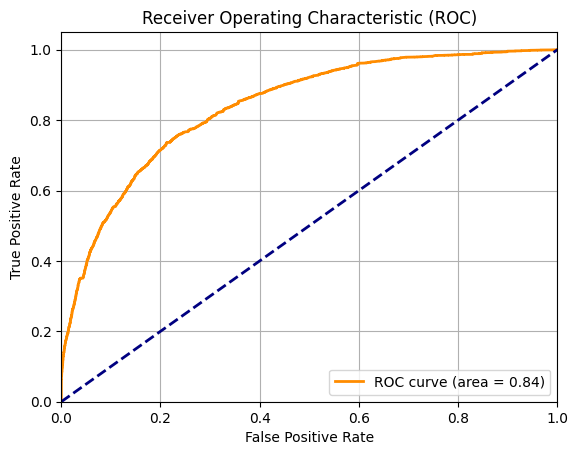

In [142]:
y_pred = LogisticReg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [143]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.698


Checking tuned Logistic Regression model performance on training set

In [144]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit
)
logistic_reg_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.752998,0.736586,0.877094,0.800723


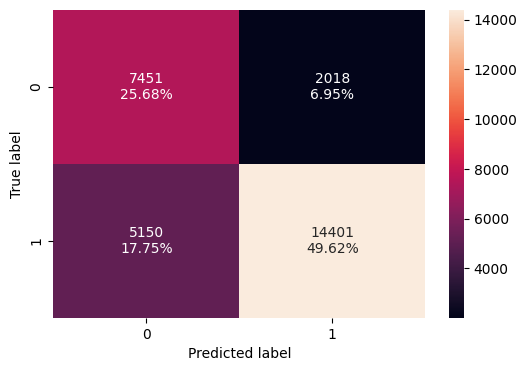

In [145]:
plot_confusion_matrix(LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit)

Checking tuned Logistic Regression model performance on test set

In [146]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit
)

logistic_reg_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.757547,0.745609,0.87234,0.804011


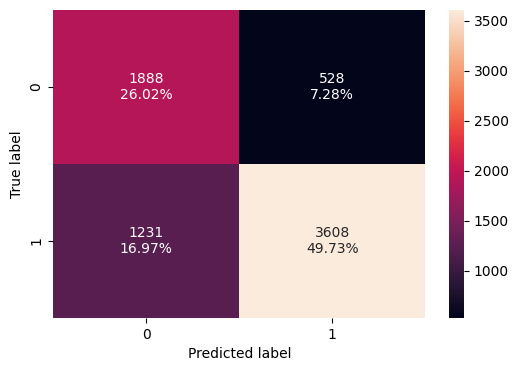

In [147]:
plot_confusion_matrix(LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit)

KNN Classifier (different values of K)

KNN Classifier Performance Improvement using different k values

In [148]:
# Define the range for k values
k_values = range(2,21)
best_k = 0
best_recall = 0

# Loop through each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    # Predict on the test set
    y_pred = knn.predict(X_test_scaled)
    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    # Print the recall score for the current k value
    print(f'Recall for k={k}: {recall}')
    # Update the best k and best recall score if the current recall is higher
    if recall > best_recall:
        best_recall = recall
        best_k = k

# Print the best k value and its recall score
print(f'\nThe best value of k is: {best_k} with a recall of: {best_recall}')

Recall for k=2: 0.7877660673692912
Recall for k=3: 0.9063856168629882
Recall for k=4: 0.8561686298822071
Recall for k=5: 0.9127918991527175
Recall for k=6: 0.8786939450299649
Recall for k=7: 0.9185782186402149
Recall for k=8: 0.8941930150857615
Recall for k=9: 0.9194048357098574
Recall for k=10: 0.9003926431080802
Recall for k=11: 0.922917958255838
Recall for k=12: 0.9072122339326307
Recall for k=13: 0.9237445753254805
Recall for k=14: 0.9094854308741476
Recall for k=15: 0.9222979954536061
Recall for k=16: 0.9049390369911139
Recall for k=17: 0.9194048357098574
Recall for k=18: 0.9090721223393263
Recall for k=19: 0.9187848729076256
Recall for k=20: 0.9090721223393263

The best value of k is: 13 with a recall of: 0.9237445753254805


In [149]:
knn_tuned = KNeighborsClassifier(n_neighbors = best_k)
knn_tuned.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

Checking tuned KNN model performance on training set

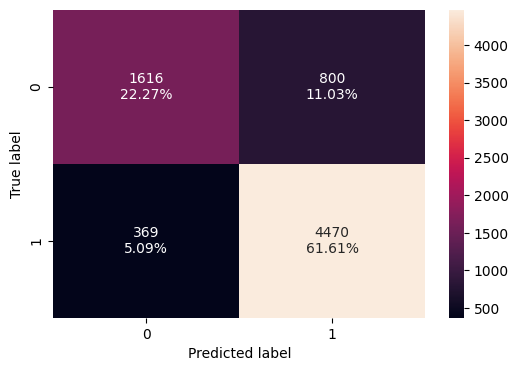

In [150]:
knn_tuned_perf_test = model_performance_classification(model = knn_tuned, predictors = X_test_scaled, target = y_test)
knn_tuned_perf_test
plot_confusion_matrix(model = knn_tuned, predictors = X_test_scaled, target = y_test)

Decision Tree Classifier (pre-pruning)

In [152]:
from sklearn.metrics import make_scorer, recall_score
dt_model_tuned = DecisionTreeClassifier(random_state=42)
parameters = {
    "max_depth": np.arange(5, 13, 2),
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],
    "min_samples_split": [2, 5, 7, 10, 20, 30],
    "class_weight": ['balanced', None]
}

acc_scorer = make_scorer(recall_score)
# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
dt_model_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data.
dt_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=100, random_state=42)

Checking tuned Decision Tree Classifier performance on training set

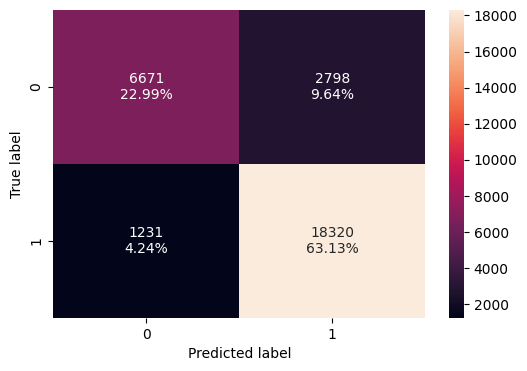

In [153]:
decision_tree_tuned_perf_train = model_performance_classification(model=dt_model_tuned, predictors=X_train, target=y_train)
decision_tree_tuned_perf_train
plot_confusion_matrix(model=dt_model_tuned, predictors=X_train, target=y_train)

Checking tuned Decision Tree Classifier performance on test set

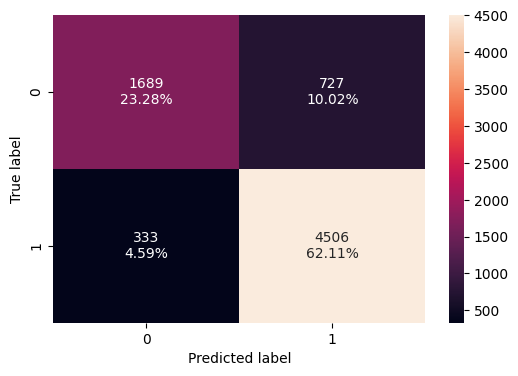

In [154]:
decision_tree_tuned_perf_test = model_performance_classification(model=dt_model_tuned, predictors=X_test, target=y_test)
decision_tree_tuned_perf_test
plot_confusion_matrix(model=dt_model_tuned, predictors=X_test, target=y_test)

Visualizing the Decision Tree

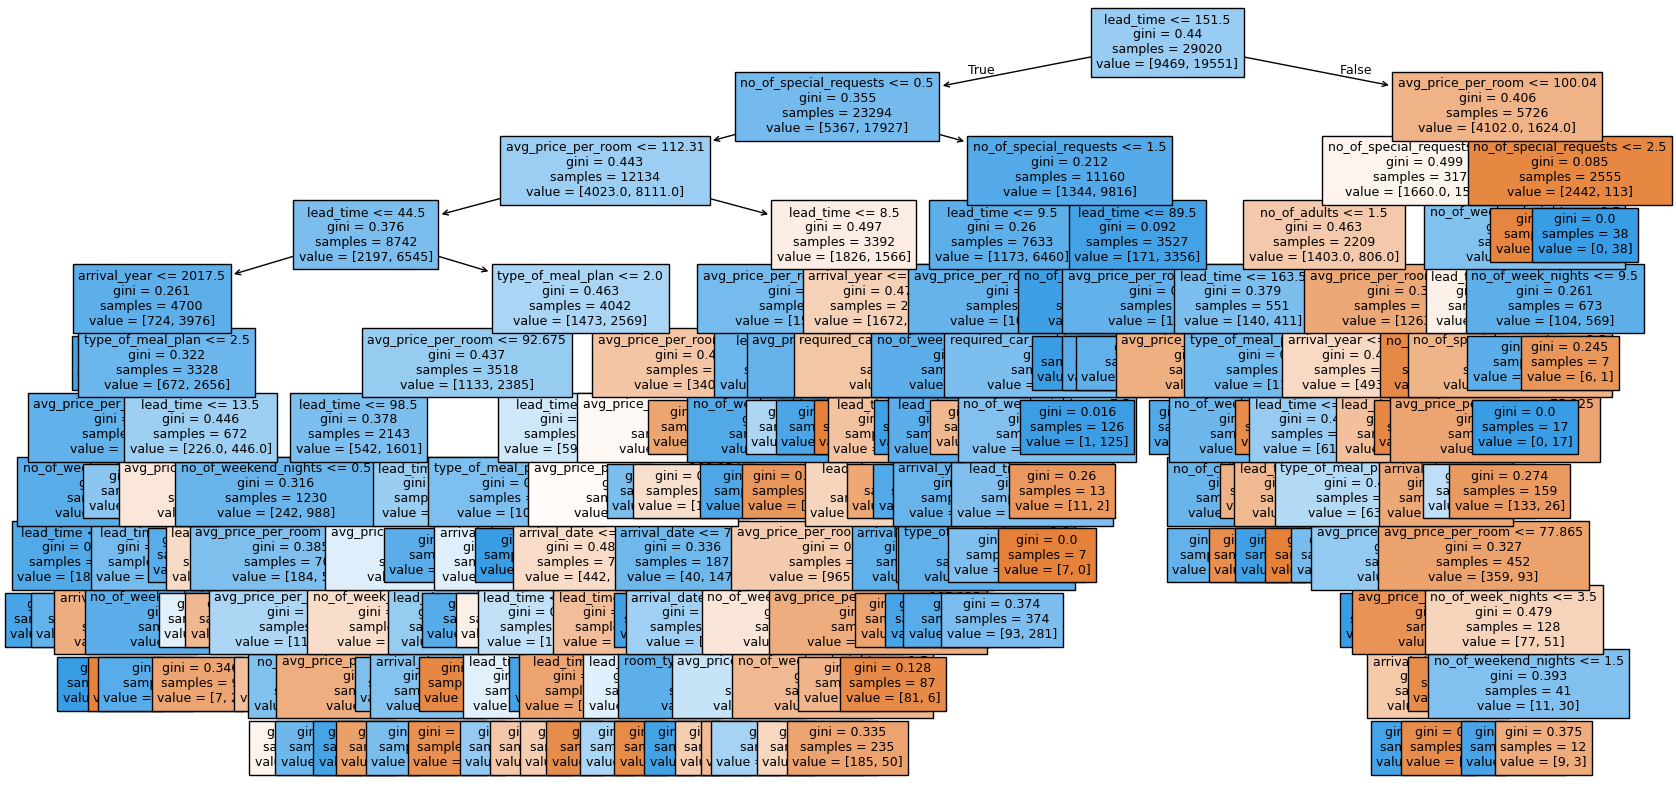

In [155]:
from sklearn import tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Analyzing Feature Importance for tuned Decision Tree Classifier

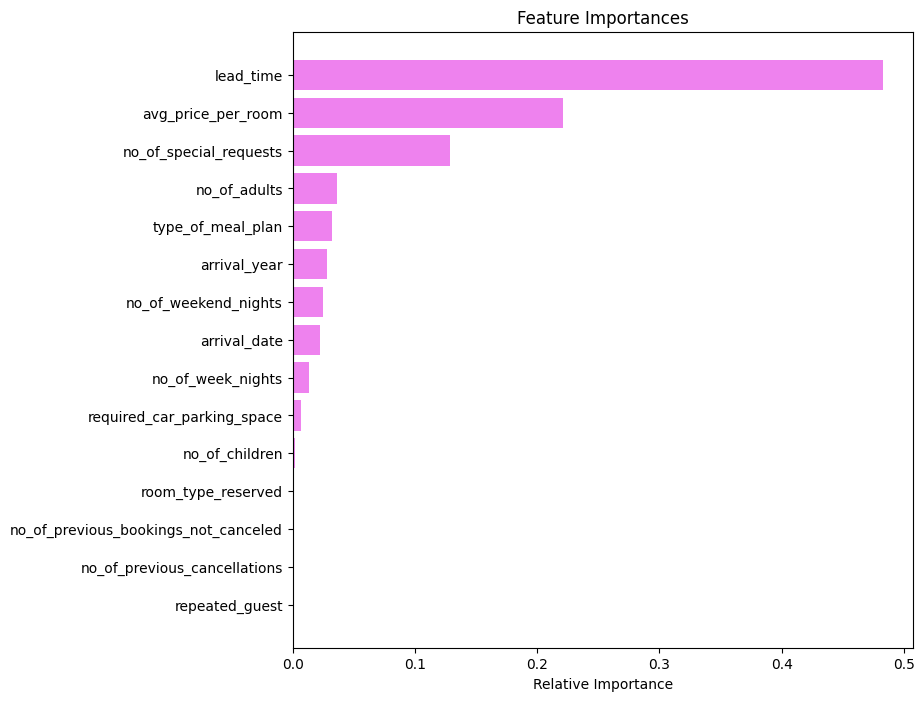

In [156]:
#importance of features in the tree building
feature_names = X_train.columns.tolist()
importances = dt_model_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Model Performance Comparison and Final Model Selection**

In [157]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_train.T,
        knn_perf_train.T,
        decision_tree_tuned_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "Decision Tree Tuned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,Decision Tree Tuned
Accuracy,0.786044,0.752998,0.428360,0.908994,0.861165
Recall,0.898573,0.736586,0.159941,0.945681,0.937036
Precision,0.806093,0.877094,0.949878,0.921318,0.867506
F1,0.849825,0.800723,0.273782,0.933340,0.900932


KNN stands out as the best-performing model, demonstrating the highest accuracy and balanced metrics.
Logistic Regression (base) shows strong potential for interpretability and effectiveness, while the tuned version may require further optimization.
Naive Bayes appears inadequate for this classification task, given its low overall performance.
The Decision Tree, while not the top performer, offers a solid balance between precision and recall, making it a viable option.

In [158]:
models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_test.T,
        knn_perf_test.T,
        knn_tuned_perf_test.T,

        decision_tree_tuned_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",

    "Decision Tree Tuned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,KNN Tuned,Decision Tree Tuned
Accuracy,0.786044,0.752998,0.433770,0.842729,0.838870,0.853894
Recall,0.898573,0.736586,0.160570,0.904112,0.923745,0.931184
Precision,0.806093,0.877094,0.944107,0.865994,0.848197,0.861074
F1,0.849825,0.800723,0.274461,0.884643,0.884360,0.894758


•	The Decision Tree emerges as the best-performing model, showcasing the highest accuracy and a strong balance between Recall and Precision.
•	The KNN model also performed well, particularly in Recall, making it a strong candidate for this classification task.
•	The Logistic Regression models demonstrated mixed results, with the base model performing better than the tuned version.
•	The Naive Bayes model is not suitable for this task due to its low overall performance


##**Actionable Insights and Recommendations**

insights based on the analysis
 1. Feature Importance:
Analyze the feature importance from the decision tree to understand which features are the most significant in predicting the target variable.
This information can be useful for identifying key drivers and factors that influence the outcome.
2. Confusion Matrix:
 Examine the confusion matrices to identify potential areas for improvement.
 For instance, if the model has a high number of false negatives, it might be necessary to adjust the model or explore different strategies to reduce this error type.
3. ROC Curve:
The ROC curve helps you visualize the trade-off between true positive and false positive rates for different threshold values.
The optimal threshold can be chosen to balance the sensitivity and specificity of the model based on the specific needs of the application.
4. Model Interpretability:
Logistic regression models are usually more interpretable compared to other models like KNN or decision trees.
If interpretability is crucial, consider using logistic regression, especially after tuning and feature selection.
 5. Business Impact:
Consider the business implications of the model's predictions and their impact on decision-making.
For instance, if the model is used for customer churn prediction, you can develop strategies to retain customers based on the identified risk factors.
 Implementing targeted interventions based on the identified risk factors.
Optimizing business processes based on the model's predictions.
Developing new strategies based on the model's insights.
Further refining the model with additional data or features to improve performance.


